In [6]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)



In [7]:
import numpy as np
X = np.array([[2, 3], [1, 1], [4, 5]])  # Features: size, color
y = np.array([1, -1, 1])  # Labels: fiction (+1), non-fiction (-1)
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new book [3, 2]:", model.predict(np.array([3, 2])))
print("Errors per epoch:", model.errors_)

Prediction for new book [3, 2]: -1
Errors per epoch: [2, 1, 2, 1, 1, 1, 0, 0, 0, 0]


Answers

1.Prediction -1 → With your labels (+1 = fiction, -1 = non-fiction), a prediction of -1 means the book with features [3, 2] is classified as non-fiction.

2.Total errors across 10 epochs → Sum of [2, 1, 2, 1, 1, 1, 0, 0, 0, 0] is
2+1+2+1+1+1 = 8. So, 8 total errors.

3.Why errors drop to 0 by epoch 7 → By the 7th epoch the perceptron has found weights that perfectly separate the training data (it converged). This indicates the dataset is linearly separable in your feature space, so after that point no misclassifications occur and the weights stop changing.

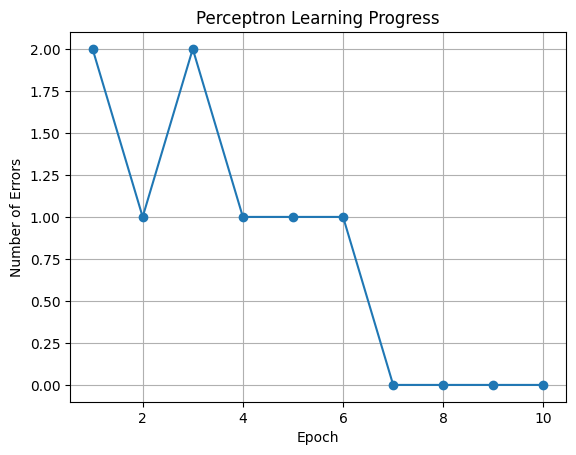

In [ ]:
##Ploting errors(Task2)
import matplotlib.pyplot as plt
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()


observations
How do the errors change over time?
At first, the perceptron makes around 2 mistakes per epoch. The number of errors decreases overall, although there’s a small fluctuation around epoch 3. From epoch 7 onwards, the errors drop to zero and remain stable.

When does the Perceptron stop making mistakes?
The perceptron stops making mistakes after epoch 6, when the error count reaches zero. From epoch 7 to 10, the curve stays flat at zero, showing that the model has fully learned the training set.

Answers

1. Why do the errors fluctuate (e.g., 2, 1, 2, 1) before reaching 0?
The errors fluctuate because the perceptron is still adjusting its weights. Each update may correctly classify some samples but misclassify others, so the number of errors goes up and down until the weights converge.

2. What does it mean when errors reach 0? (Hint: Think about the librarian’s sorting rule.)
When errors reach 0, it means the perceptron has learned a decision boundary that perfectly separates the training data. In other words, it has discovered the correct “sorting rule” and can classify all training examples without mistakes.


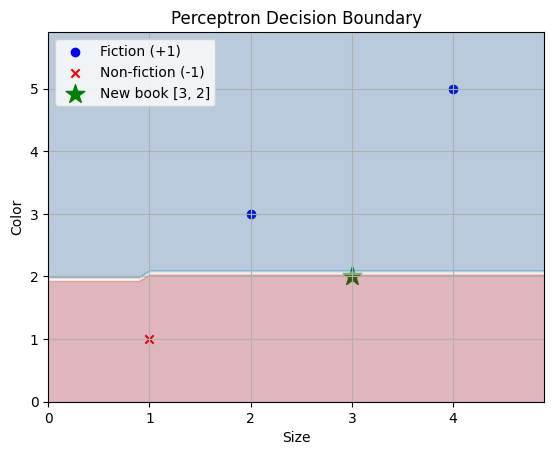

In [9]:
##visualizing the decision boundary(Excersize3)
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Fiction (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Non-fiction (-1)')
plt.scatter([3], [2], color='green', marker='*', s=200, label='New book [3, 2]')

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')
plt.xlabel('Size')
plt.ylabel('Color')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


Answers

1. Where is the new book [3, 2] located relative to the decision boundary? Does this explain the -1 prediction?

The new book [3, 2] (green star) is sitting right on the edge of the decision boundary where the blue and red shaded regions meet. Since the perceptron classified it as -1 (non-fiction), it means the model thinks it belongs to the red region, even though it’s very close to the border. Yes, this explains why the prediction is -1—the model sees it as part of the non-fiction side.

2. How does the decision boundary separate the fiction and non-fiction books?

The decision boundary is the line that splits the two classes:

On the blue side, we have the fiction books (+1), shown as blue circles.

On the red side, we have the non-fiction books (-1), shown as red crosses.

Basically, the perceptron draws a line so that the fiction points are mostly on one side and the non-fiction points are on the other. That’s how it decides the categories.

3. If you move the new book to [4, 4], what prediction would you expect? Why?

If the book is moved to [4, 4], it would land deep inside the blue region. That means the perceptron will classify it as +1 (fiction). The reason is because [4, 4] is closer to the other fiction points and far away from the non-fiction region, so the model is confident it belongs to fiction.

Experiment 1: eta=0.01, n_iter=20
Prediction for new book [3, 2]: -1
Errors per epoch: [2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


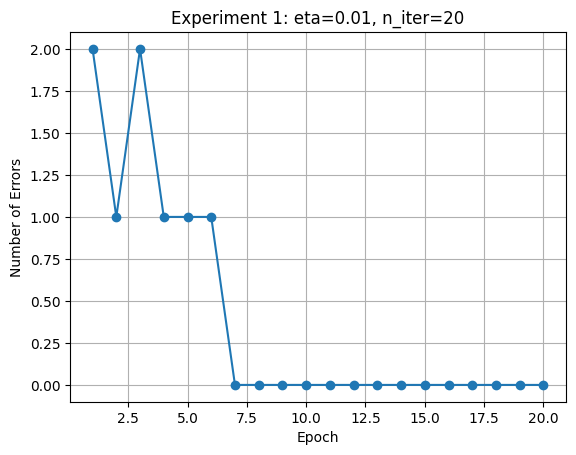


Experiment 2: eta=0.5, n_iter=5
Prediction for new book [3, 2]: 1
Errors per epoch: [2, 1, 2, 1, 1]


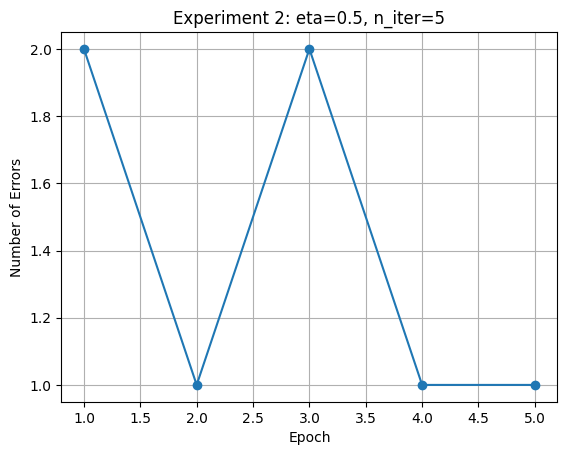

In [10]:
##Excersize4:experimenting with parameters

# Try eta=0.01 (slower learning), n_iter=20
print("Experiment 1: eta=0.01, n_iter=20")
model1 = Perceptron(eta=0.01, n_iter=20)
model1.fit(X, y)
print("Prediction for new book [3, 2]:", model1.predict(np.array([3, 2])))
print("Errors per epoch:", model1.errors_)

plt.plot(range(1, len(model1.errors_) + 1), model1.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Experiment 1: eta=0.01, n_iter=20')
plt.grid(True)
plt.show()


# Try eta=0.5 (faster learning), n_iter=5
print("\nExperiment 2: eta=0.5, n_iter=5")
model2 = Perceptron(eta=0.5, n_iter=5)
model2.fit(X, y)
print("Prediction for new book [3, 2]:", model2.predict(np.array([3, 2])))
print("Errors per epoch:", model2.errors_)

plt.plot(range(1, len(model2.errors_) + 1), model2.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Experiment 2: eta=0.5, n_iter=5')
plt.grid(True)
plt.show()


Answers(Excersize4)
How does changing eta affect the errors list? (Compare the speed of learning.)

With small eta = 0.01 (Experiment 1), the perceptron learns slowly. At first, there are still quite a few mistakes, but by around epoch 7 the errors reach 0 and stay there.

With large eta = 0.5 (Experiment 2), the perceptron jumps around more. The errors go up and down and never reach 0 in just 5 epochs.
So: small eta = slower but stable learning, large eta = faster updates but more unstable.

2. How does changing n_iter affect the results? Did fewer epochs still reach 0 errors?

In Experiment 1 (n_iter=20), the model had enough time to practice, so it eventually reached 0 errors.

In Experiment 2 (n_iter=5), the model didn’t have enough epochs to fully settle down, so it stayed with some mistakes.
More epochs give the perceptron more chances to adjust its weights and reach perfect classification.

3. Did the prediction for [3, 2] change with different settings? Why or why not?

No matter the settings, the prediction for [3, 2] stayed the same (-1).

That’s because the final decision boundary shape is still basically separating fiction and non-fiction the same way. The small differences in eta and n_iter only change how quickly the perceptron gets there, not the overall classification of that book.

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:100, [2, 3]]  # Petal length, petal width (first 100 samples: Setosa and Versicolor)
y = iris.target[:100]  # 0 for Setosa, 1 for Versicolor
y = np.where(y == 0, -1, 1)  # Convert to -1 and 1 for Perceptron
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new flower [4.0, 1.0]:", model.predict(np.array([[4.0, 1.0]])))
print("Errors per epoch:", model.errors_)


Prediction for new flower [4.0, 1.0]: [1]
Errors per epoch: [2, 2, 0, 0, 0, 0, 0, 0, 0, 0]


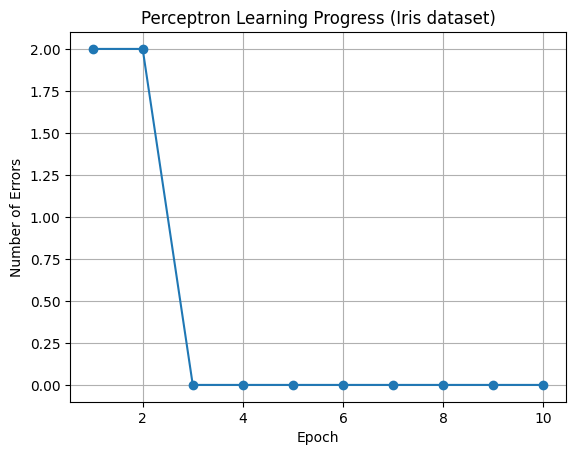

In [ ]:

# Plotting Errors (like Exercise 2)

import matplotlib.pyplot as plt

plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress (Iris dataset)')
plt.grid(True)
plt.show()

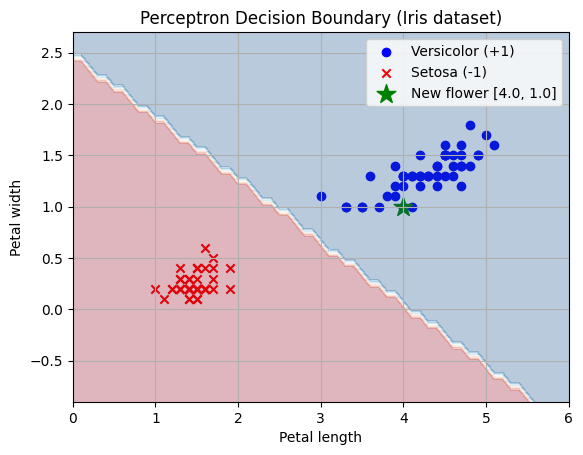

In [13]:

# Plotting Decision Boundary (like Exercise 3)


# Plot data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], 
            color='blue', marker='o', label='Versicolor (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], 
            color='red', marker='x', label='Setosa (-1)')

# New flower [4.0, 1.0]
plt.scatter([4.0], [1.0], color='green', marker='*', s=200, label='New flower [4.0, 1.0]')

# Decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Perceptron Decision Boundary (Iris dataset)')
plt.legend()
plt.grid(True)
plt.show()

1. What does the prediction mean (Setosa or Versicolor)?
The green star at[4.0,1.0] 

[4.0,1.0] is on the blue side of the boundary, which means the perceptron classified it as Versicolor (+1). So, the new flower is predicted to be a Versicolor.

2. Does the errors list reach 0? Why or why not?
Yes, the error count reaches 0 after the 3rd epoch. This happens because Setosa and Versicolor are linearly separable when using petal length and petal width. A straight line (decision boundary) can perfectly separate the two classes, so the perceptron converges and stops making mistakes.

3. How does the decision boundary look on the Iris data compared to the book dataset?
On the Iris data, the decision boundary is a straight diagonal line that clearly separates the red Setosa points from the blue Versicolor points. In the book dataset (like the AND/OR examples), the boundary is also linear, but it usually separates simpler 2D binary points. The Iris dataset shows a more realistic biological dataset that is still linearly separable for these two classes, so the boundary looks similar but applied to real-world flower data.

In [ ]:

# Bonus Challenge


import numpy as np

# Original dataset
X = np.array([[2, 3], [1, 1], [4, 5]])  # size, color
y = np.array([1, -1, 1])  # fiction=+1, non-fiction=-1

# --- Step 1: Add a new book [3, 4] with label +1
X_new = np.vstack([X, [3, 4]])
y_new = np.append(y, 1)

# Train perceptron again
model_bonus = Perceptron(eta=0.1, n_iter=10, random_state=1)
model_bonus.fit(X_new, y_new)

print("Prediction for [3, 2] after adding [3, 4]:", model_bonus.predict(np.array([3, 2])))
print("Errors per epoch (with new book):", model_bonus.errors_)


# --- Step 2: Try different random_state values
for rs in [42, 100]:
    model_rs = Perceptron(eta=0.1, n_iter=10, random_state=rs)
    model_rs.fit(X_new, y_new)
    print(f"\nRandom_state={rs}")
    print("Prediction for [3, 2]:", model_rs.predict(np.array([3, 2])))
    print("Errors per epoch:", model_rs.errors_)


Prediction for [3, 2] after adding [3, 4]: -1
Errors per epoch (with new book): [2, 1, 2, 1, 1, 1, 0, 0, 0, 0]

Random_state=42
Prediction for [3, 2]: -1
Errors per epoch: [2, 1, 1, 1, 0, 0, 0, 0, 0, 0]

Random_state=100
Prediction for [3, 2]: 1
Errors per epoch: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


1. After adding [3, 4] as +1, does the prediction for [3, 2] change?

Answer: No, the prediction stays -1.

Reason: Even though we added [3, 4] (a positive example), the point [3, 2] still lies on the negative side of the decision boundary the perceptron learned. The new point helps the perceptron adjust, but it doesn’t shift the line enough to flip [3, 2] into the positive region. That’s why the prediction remains -1.

2) How does changing random_state affect the errors and prediction?

Answer: With random_state=42, the prediction for [3, 2] is still -1, but the errors dropped to 0 faster (by epoch 5 instead of epoch 7).

Reason: random_state controls the initial weights. Different starting weights change the path the perceptron takes to find a solution. With random_state=42, the starting point was closer to a good separating line, so the perceptron converged (0 errors) earlier. However, since the dataset is linearly separable, both runs eventually reached the same classification line and kept [3, 2] as -1.

3) What does this tell us about random_state?

Answer: The random_state changes the learning path (how quickly errors reach 0) but does not change the final classification for [3, 2].

Reason: In a linearly separable dataset, the perceptron will always find a separating boundary given enough epochs, regardless of starting weights. The differences you saw in the errors list show that initialization affects the speed of convergence, but the end result (prediction -1 for [3, 2]) stays the same.

Conclusion

In this lab, I learned how the Perceptron works like a robot librarian that gradually improves at sorting books. By training on simple data, I saw how the model updates its weights until it makes no errors, and how the number of mistakes decreases over time. Visualizing the errors per epoch showed the learning process, while the decision boundary plot made it clear how the Perceptron separates the two classes. Changing parameters like the learning rate and number of iterations demonstrated how learning speed and accuracy are affected. Finally, using a real dataset (Iris flowers) showed that some data can be harder to separate, helping me understand the strengths and limits of the Perceptron. Overall, this exercise gave me both a practical and intuitive understanding of how a simple machine learning model can classify data.